### PLOT 4

In [122]:
import json
import numpy as np
import pandas as pd
import seaborn as sns

In [12]:
with open("../../Data/last/Model/indices_split_cache.json", "r") as read_file:
    Cache_json = json.load(read_file)

In [16]:
indices_test = Cache_json["indices_test"]

In [44]:
data = pd.read_pickle("../../Data/last/Model/Predictions.pkl")

In [45]:
meta_data = pd.read_pickle("../../Data/last/filtered.pkl")

In [46]:
meta_data = meta_data.iloc[indices_test]

In [68]:
data["Predictions_2.0"] = abs(data["Predictions"] - data["True_labels"])
data["Disease_highest_level"] = meta_data["Disease_highest_level"].tolist()
data["Disease_lowest_level"] = meta_data["Disease_lowest_level"].tolist()

In [97]:
data2 = data.groupby(["Disease_highest_level", "Predictions_2.0"]).size().reset_index(name="Count")
data3 = data.groupby(["Disease_lowest_level", "Predictions_2.0"]).size().reset_index(name="Count")

In [103]:
def to_percentage(row, map_dict, level):
    if level == "High":
        dis = row["Disease_highest_level"]
    elif level == "Low":
        dis = row["Disease_lowest_level"]
    to_div = map_dict.get(dis)
    row["percentage"] = row["Count"] / to_div
    return row

In [104]:
all_disease = dict(Counter(data["Disease_highest_level"]))
data2 = data2.apply(to_percentage, map_dict=all_disease, level="High", axis=1)

In [105]:
all_disease = dict(Counter(data["Disease_lowest_level"]))
data3 = data3.apply(to_percentage, map_dict=all_disease, level="Low", axis=1)

In [163]:
data_dict2 = {}
for disease in data2["Disease_highest_level"].unique():
    tmp = data2[data2["Disease_highest_level"] == disease]
    
    tmp_pred = tmp[tmp["Predictions_2.0"] == 0]
    if tmp_pred.empty:
        data_dict2[disease] = [0, 1]
    else:
        data_dict2[disease] = [tmp_pred.iloc[0]["percentage"], 1-tmp_pred.iloc[0]["percentage"]]
        
data_dict2 = pd.DataFrame(data_dict2)

data_dict3 = {}
for disease in data3["Disease_lowest_level"].unique():
    tmp = data3[data3["Disease_lowest_level"] == disease]
    
    tmp_pred = tmp[tmp["Predictions_2.0"] == 0]
    if tmp_pred.empty:
        data_dict3[disease] = [0, 1]
    else:
        data_dict3[disease] = [tmp_pred.iloc[0]["percentage"], 1-tmp_pred.iloc[0]["percentage"]]
        
data_dict3 = pd.DataFrame(data_dict3)

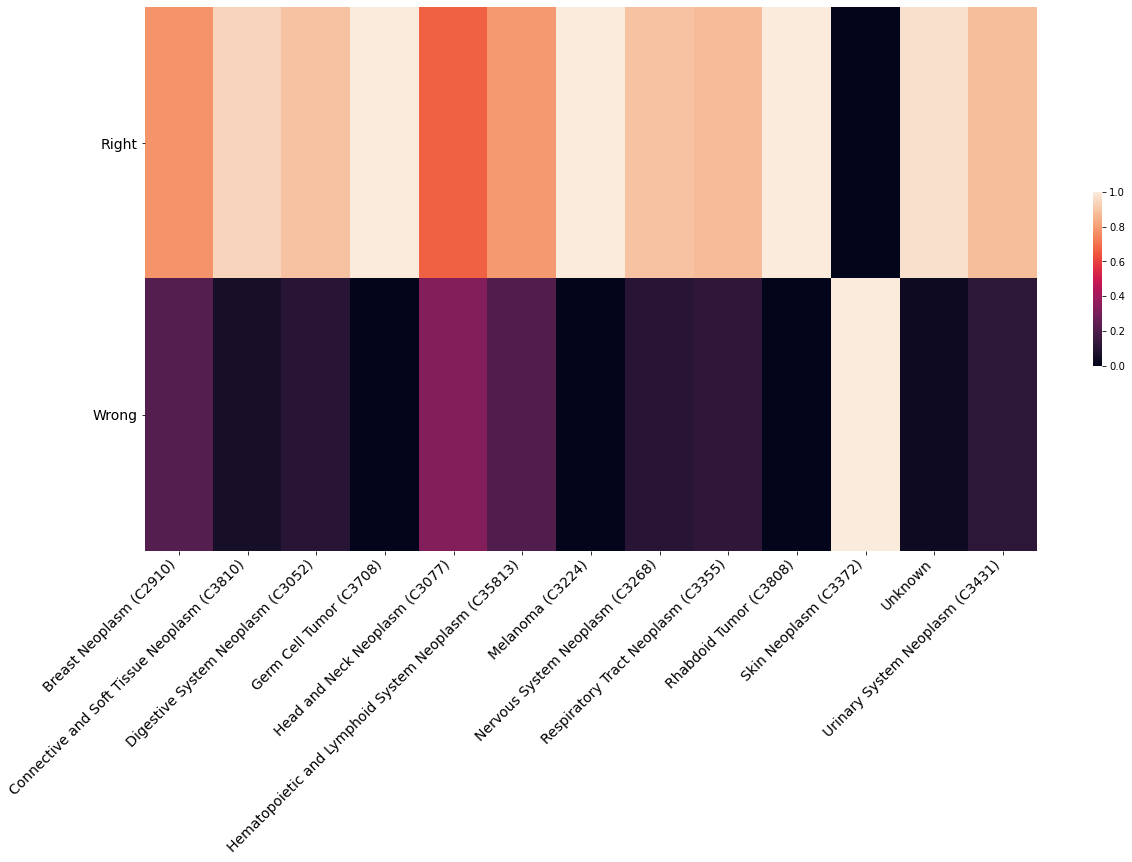

In [181]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)
d = {}
yticks = ["Right", "Wrong"]

sns.heatmap(data_dict2, square=False, vmin=0, cbar=True, cbar_kws={"shrink": .32})

ax.axis('tight')
ax.set_yticklabels(yticks,fontsize=14, rotation=0)
ax.set_xticklabels(labels=data_dict2.columns.tolist(), rotation=45, ha='right', fontsize=14)
plt.show()

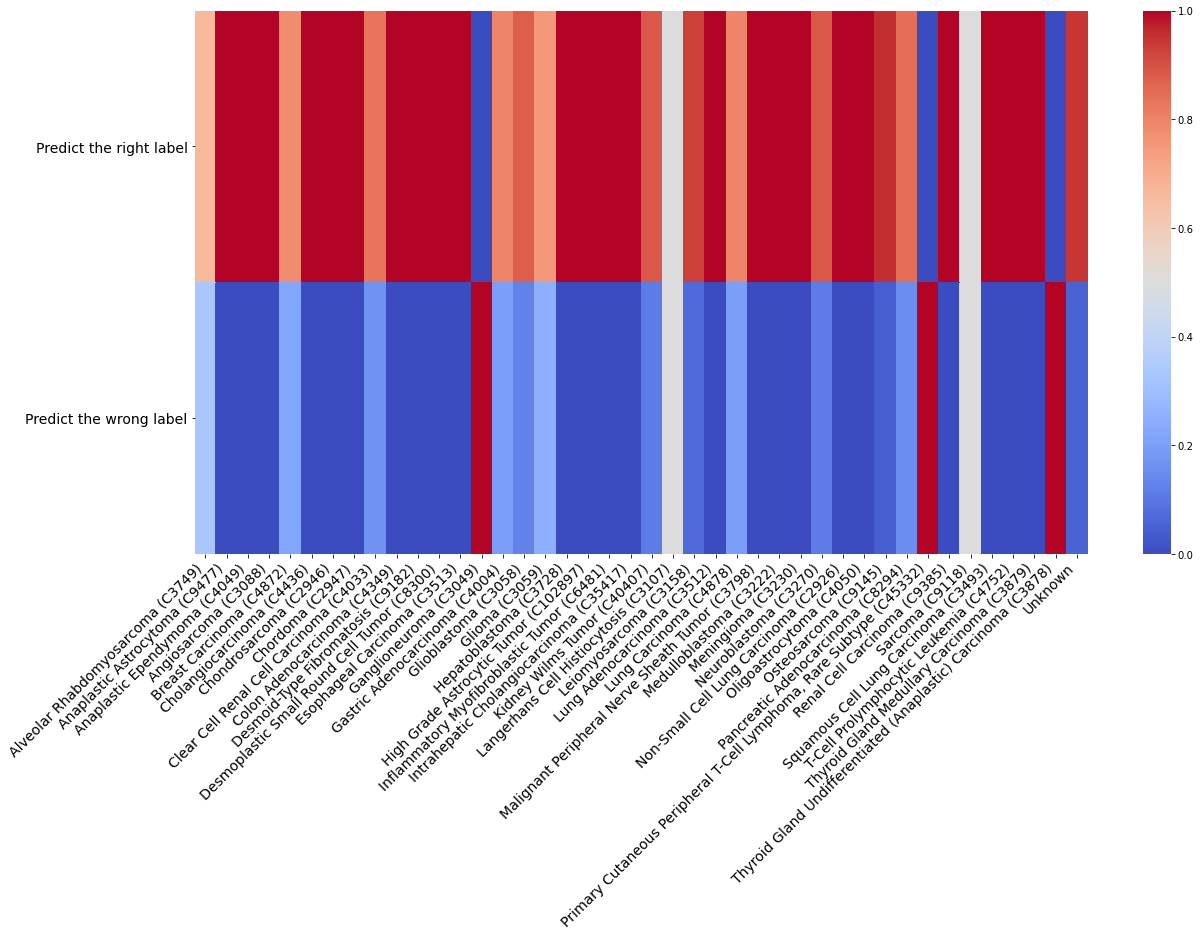

In [199]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)
d = {}
yticks = ["Predict the right label", "Predict the wrong label"]

sns.heatmap(data_dict3, square=False, vmin=0, cbar=True, cmap="coolwarm")

ax.axis('tight')
ax.set_yticklabels(yticks,fontsize=14, rotation=0)
ax.set_xticklabels(labels=data_dict3.columns.tolist(), rotation=45, ha='right', fontsize=14)
plt.show()